In [1]:
import pandas as pd
import numpy as np
from counlist import countrylist

In [2]:
suicide = pd.read_csv("..\\documentation\\who_suicide_statistics.csv")
print(suicide.dtypes, "\n\n", "Rows, Columns: ", suicide.shape,"\n\n", suicide.columns, "\n\n", suicide.head())

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object 

 Rows, Columns:  (43776, 6) 

 Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object') 

    country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0


In [3]:
suicide

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [4]:
suic = suicide.loc[suicide["country"].isin(countrylist)]   #selecting values only for countries in both dataframes

In [5]:
suic.year.unique()

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int64)

In [6]:
suic = suic.rename(columns={'sex': 'gender'})
suic = suic[suic['year'] >= 2000]                 #setting years range according to unemployment dataframe

In [7]:
suic.gender.unique()

array(['female', 'male'], dtype=object)

In [8]:
suic.age.unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [9]:
suic['age'] = suic['age'].str.replace('years', '') #normalising age format

In [10]:
suic = suic[~suic.age.str.contains("14", na=False)]    
suic = suic[~suic.age.str.contains("75+", na=False)]    

In [11]:
#suic.set_index('country', inplace=True)

In [12]:
suic["suic_100k"] = (suic["suicides_no"] / suic["population"])* 100000

In [13]:
suic.describe()

,year,suicides_no,population,suic_100k
count,5448.000000,5384.000000,5.448000e+03,5384.000000
mean,2007.609398,410.053306,2.814887e+06,14.465449
std,4.660392,1204.265199,4.274557e+06,15.223035
min,2000.000000,0.000000,1.977100e+04,0.000000
25%,2004.000000,28.000000,3.375688e+05,4.393705
50%,2008.000000,94.000000,9.308780e+05,9.623233
75%,2012.000000,295.000000,3.659594e+06,19.249102
max,2016.000000,21262.000000,2.846186e+07,134.291999


In [14]:
import matplotlib as plt
import seaborn as sns
import plotly as po

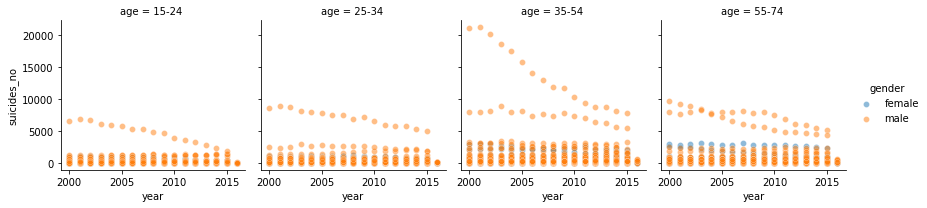

In [15]:
h = sns.FacetGrid(suic, col="age", hue="gender")
h.map(sns.scatterplot, "year", "suicides_no", alpha=.5)
h.add_legend()